# A simple plot

In [2]:
import matplotlib.pyplot as plt
import numpy as np

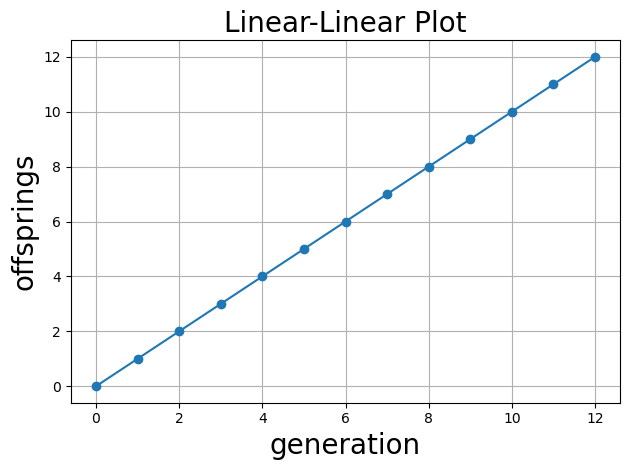

In [3]:
generation = np.array([0,1, 2, 3, 4, 5,6,7,8,9,10,11,12])
new_offsprings =np. array([0,1,2,3,4,5,6,7,8,9,10,11,12,])

plt.plot(generation, new_offsprings, marker='o')

plt.xlabel('generation',fontsize=20)
plt.ylabel('offsprings',fontsize=20)
plt.title('Linear-Linear Plot',fontsize=20)
plt.grid(True)
plt.tight_layout()
plt.savefig("sonia.png")
plt.show()

# log-linear plot

ValueError: 'log2' is not a valid value for scale; supported values are 'linear', 'log', 'symlog', 'asinh', 'logit', 'function', 'functionlog'

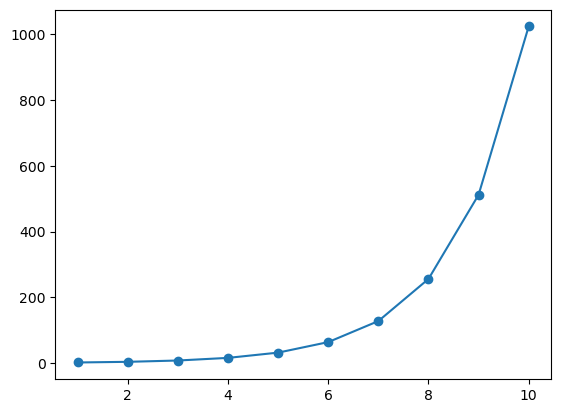

In [4]:
generation = np.array([1, 2, 3, 4, 5,6,7,8,9,10])
new_offsprings = np.array([2,4,8,16,32,64,128,256,512,1024])

plt.plot(generation, new_offsprings, marker='o')

plt.yscale('log2')  # Log scale on the y-axis
plt.xlabel('generation',fontsize=20)
plt.ylabel('offsprings (log scale)',fontsize=20)
plt.title('Log-Linear Plot',fontsize=20)
plt.grid(False)
plt.tight_layout()
plt.savefig("offsprings_bacteria_log.png")
plt.show()

# Linear regression for straighline fitting

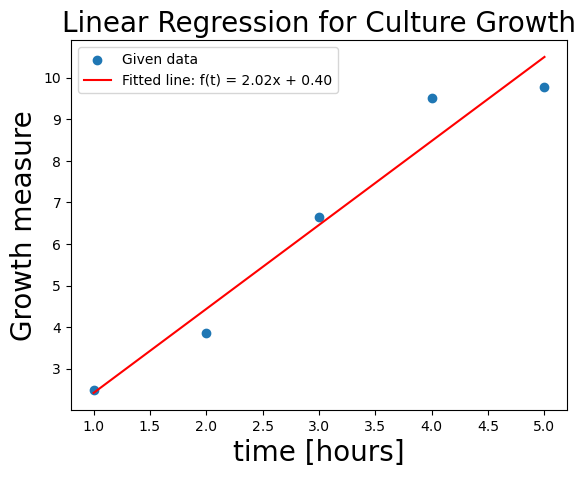

Slope of the fitted line: 2.02
Intercept of the fitted line: 0.40


In [4]:
from sklearn.linear_model import LinearRegression

t = np.array([1, 2, 3, 4, 5])
t = t.reshape(-1, 1) # make it a column vector
growth= np.array([2.497, 3.862,  6.648, 9.523, 9.766])


# Create a linear regression model
model = LinearRegression() 

# Fit the model to the data
model.fit(t, growth)

# Get the coefficients of the fitted line
A = model.coef_[0] # slope
B = model.intercept_ # intercept

# Predict the values using the fitted model
predicted_growth = model.predict(t)

# Plot the data and fitted line
plt.scatter(t, growth, label='Given data')
plt.plot(t, predicted_growth, label=f'Fitted line: f(t) = {A:.2f}x + {B:.2f}', color='red')
plt.xlabel('time [hours]',fontsize=20)
plt.ylabel('Growth measure',fontsize=20)
plt.title('Linear Regression for Culture Growth',fontsize=20)
plt.legend()
plt.savefig("growth.png")
plt.show()

print(f"Slope of the fitted line: {A:.2f}")
print(f"Intercept of the fitted line: {B:.2f}")


# Michaelis-Menten curve fitting 

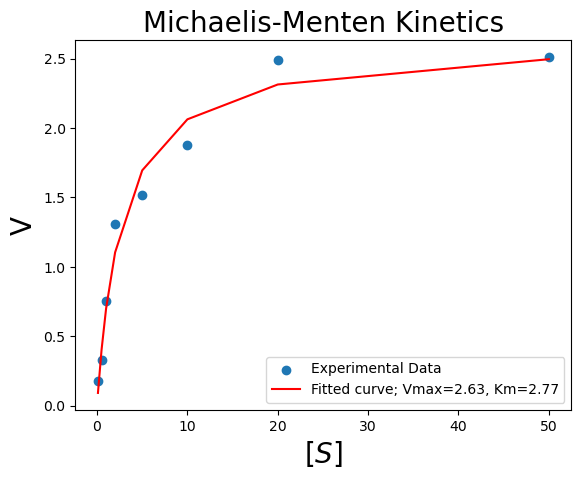

Fitted Vmax: 2.63
Fitted Km: 2.77


In [5]:
from scipy.optimize import curve_fit

# Michaelis-Menten function
def michaelis_menten(S, Vmax, Km):
    return Vmax * S / (Km + S)

# Reaction data
S=np.array([0.1, 0.5, 1, 2, 5, 10, 20, 50])
V=np.array([0.180, 0.329, 0.754, 1.305, 1.516, 1.876, 2.490, 2.512])

# Fit the Michaelis-Menten equation using curve_fit
params, covariance = curve_fit(michaelis_menten, S, V)

# Fitted parameters
Vmax_fit, Km_fit = params

# Plot 
plt.scatter(S, V, label='Experimental Data')
plt.plot(S, michaelis_menten(S, Vmax_fit, Km_fit), label=f'Fitted curve; Vmax={Vmax_fit:.2f}, Km={Km_fit:.2f}', color='red')
plt.xlabel('[$S$]',fontsize=20)
plt.ylabel('V',fontsize=20)
plt.title('Michaelis-Menten Kinetics',fontsize=20)
plt.legend()
plt.savefig("MichaelisMenten.png")
plt.show()

print(f"Fitted Vmax: {Vmax_fit:.2f}")
print(f"Fitted Km: {Km_fit:.2f}")

# Lineweaver-Burk line-fitting

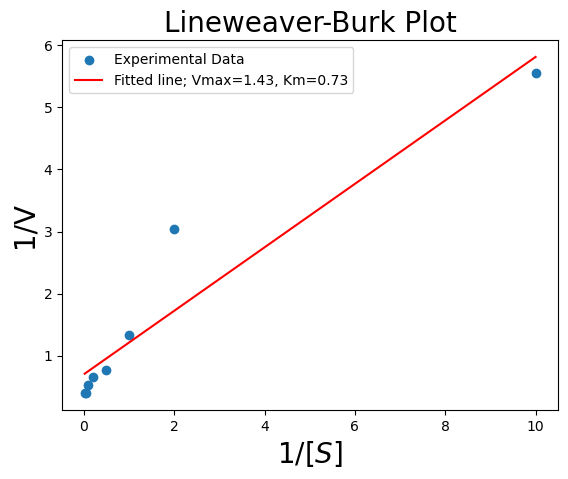

Fitted Vmax: 1.43
Fitted Km: 0.73


In [6]:
from sklearn.linear_model import LinearRegression

# Lineweaver-Burk function
def lineweaver_burk(S, Vmax, Km):
    return (Km/Vmax)*(1/S)+(1/Vmax)

# Reaction data
S=np.array([0.1, 0.5, 1, 2, 5, 10, 20, 50])
x=1/S
x=x.reshape(-1, 1)

V=np.array([0.180, 0.329, 0.754, 1.305, 1.516, 1.876, 2.490, 2.512])
y=1/V


# Create a linear regression model
model = LinearRegression() 

# Fit the model to the data
model.fit(x, y)

# Get the coefficients of the fitted line
A = model.coef_[0] # slope
B = model.intercept_ # intercept

# Predict the values using the fitted model
predicted_growth = model.predict(x)

# Fitted parameters
Vmax_fit = 1/B
Km_fit=A*Vmax_fit

# Plot 
plt.scatter(x, y, label='Experimental Data')
plt.plot(x, lineweaver_burk(S, Vmax_fit, Km_fit), label=f'Fitted line; Vmax={Vmax_fit:.2f}, Km={Km_fit:.2f}', color='red')

plt.xlabel('1/[$S$]',fontsize=20)
plt.ylabel('1/V',fontsize=20)
plt.title('Lineweaver-Burk Plot',fontsize=20)
plt.legend()
plt.savefig("LineweaverBurk.png")
plt.show()

print(f"Fitted Vmax: {Vmax_fit:.2f}")
print(f"Fitted Km: {Km_fit:.2f}")